import libraries

In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

define hyperparameters

In [21]:
EPOCH = 1000
BATCH_SIZE = 64
LR = 0.01

download and import mnist data

In [22]:
train_data = torchvision.datasets.MNIST(root='./',train=False,download=True,transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='./',train=False,transform=torchvision.transforms.ToTensor())
train_loader = Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)
train_x = Variable(train_data.test_data.view(-1,28*28)).type(torch.FloatTensor)
train_y = train_data.test_labels
alltest_x = Variable(test_data.test_data.view(-1, 28*28)).type(torch.FloatTensor)
alltest_y = test_data.test_labels
val_x = alltest_x[:5000]
val_y = alltest_y[:5000]
test_x = alltest_x[5000:]
test_y = alltest_y[5000:]

Define Fully Connected Neural Network

In [23]:
class FCNets(nn.Module):
    def __init__(self,nlist):
        super(FCNets,self).__init__()
        if len(nlist) < 2:
            print('error:not enough layers')
        else:
            self.fc = nn.Sequential()
            for n in range(len(nlist)-1):
                self.fc.add_module('linear' + str(n+1), nn.Linear(in_features=nlist[n], out_features=nlist[n+1]))
                self.fc.add_module('relu' + str(n+1), nn.ReLU())
            #self.fc.add_module('softmax', nn.Softmax())
    def forward(self,x):
        return self.fc(x)

Define Neural Net instance and optimizer, loss function

In [24]:
fc = FCNets([28*28,32,10])
print(fc)
optimizer = torch.optim.SGD(params=fc.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

FCNets(
  (fc): Sequential(
    (linear1): Linear(in_features=784, out_features=32)
    (relu1): ReLU()
    (linear2): Linear(in_features=32, out_features=10)
    (relu2): ReLU()
  )
)


In [25]:
train_acc =  []
val_acc = []
epochs = []
train_loss = []

In [26]:
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        x = x.view(-1,28*28)
        bx = Variable(x)
        by = Variable(y)
        output = fc(bx)
        loss = loss_func(output, by)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch%5 == 0:
        val_y_predict = torch.max(fc(val_x),1)[1].data
        train_y_predict = torch.max(fc(train_x),1)[1].data
        val_accuracy = sum(val_y_predict == val_y)/len(val_y)
        train_accuracy = sum(train_y_predict == train_y)/len(train_y)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
        epochs.append(epoch)
        train_loss.append(loss)
        print('Epoch:',epoch,'train loss:%.4f' %loss.data[0],'train accuracy is:%.4f' %train_accuracy,'validation accuracy is:%.4f' %val_accuracy)

Epoch: 0 train loss:2.0375 train accuracy is:0.3714 validation accuracy is:0.3634
Epoch: 5 train loss:0.9116 train accuracy is:0.8042 validation accuracy is:0.7766
Epoch: 10 train loss:0.7645 train accuracy is:0.8266 validation accuracy is:0.8006
Epoch: 15 train loss:0.5938 train accuracy is:0.8352 validation accuracy is:0.8110
Epoch: 20 train loss:0.3406 train accuracy is:0.8427 validation accuracy is:0.8188
Epoch: 25 train loss:0.1568 train accuracy is:0.8443 validation accuracy is:0.8218
Epoch: 30 train loss:0.4301 train accuracy is:0.8479 validation accuracy is:0.8276
Epoch: 35 train loss:0.7241 train accuracy is:0.8497 validation accuracy is:0.8300
Epoch: 40 train loss:0.0764 train accuracy is:0.8524 validation accuracy is:0.8328
Epoch: 45 train loss:0.5645 train accuracy is:0.8539 validation accuracy is:0.8348
Epoch: 50 train loss:0.4710 train accuracy is:0.8562 validation accuracy is:0.8380
Epoch: 55 train loss:0.4364 train accuracy is:0.8571 validation accuracy is:0.8396
Epoch:

In [27]:
test_y_predict = torch.max(fc(test_x),1)[1].data
test_accuracy = sum(test_y_predict == test_y)/len(test_y)
train_y_predict = torch.max(fc(train_x),1)[1].data
train_accuracy = sum(train_y_predict == train_y)/len(train_y)
print('Final train loss:%.4f' %loss.data[0],'Final train accuracy is:%.4f' %train_accuracy,'Final test accuracy is:%.4f' %test_accuracy)
        

Final train loss:0.0063 Final train accuracy is:0.9924 Final test accuracy is:0.9956


if neural nets size is 784 10
with lr = 0.01 
achieve accuracy of 92%
if neural nets size is 784 32 10
with lr = 0.01 epoch=1000
achieve accuracy of 99.5%

In [28]:
for param in fc.parameters():
    print(type(param.data), param.size())

<class 'torch.FloatTensor'> torch.Size([32, 784])
<class 'torch.FloatTensor'> torch.Size([32])
<class 'torch.FloatTensor'> torch.Size([10, 32])
<class 'torch.FloatTensor'> torch.Size([10])


In [29]:
torch.save(fc,'fc.pkl')

/home/yunyou/anaconda3/lib/python3.6/site-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type FCNets. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


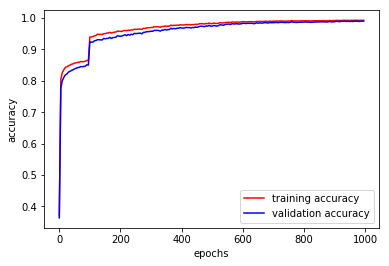

In [30]:
plt.plot(epochs,train_acc,'r',label = 'training accuracy')
plt.plot(epochs,val_acc,'b',label= 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

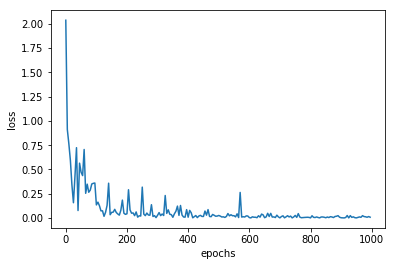

In [31]:
plt.plot(epochs,[i.data[0] for i in train_loss])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()